In [1]:
import tensorflow
import keras
import csv
import numpy
import matplotlib.pyplot as plot

random_seed = 0

#loading data
Path = "https://archive.ics.uci.edu/ml/machine-learning-databases/00451/dataR2.csv"
dataset = numpy.loadtxt(Path, delimiter=",", skiprows=1)

#shuffling data
numpy.random.seed(random_seed)
numpy.random.shuffle(dataset)

#loading inputs and outputs
X1 = dataset[:,5:6] #Leptin
X2 = dataset[:,6:7] #Adiponectin
X3 = dataset[:,0:1] #Age
X4 = dataset[:,7:8] #Resistin
X5 = dataset[:,2:3] #Glucose
X6 = dataset[:,4:5] #HOMA
Y = dataset[:,9:10] #Classification

#normalization_function
def normalization(x):
    return (x - min(x)) / (max(x) - min(x))

#normalization
X1 = normalization(X1)
X2 = normalization(X2)
X3 = normalization(X3)
X4 = normalization(X4)
X5 = normalization(X5)
X6 = normalization(X6)

#load training data (Y)
Y = Y - 1

Using TensorFlow backend.


In [2]:
#setting a random seed
numpy.random.seed(random_seed)

#constructing input layers
input_layer_X1 = keras.layers.Input(shape=(1, ), name='input_layer_X1')
input_layer_X2 = keras.layers.Input(shape=(1, ), name='input_layer_X2')
input_layer_X3 = keras.layers.Input(shape=(1, ), name='input_layer_X3')
input_layer_X4 = keras.layers.Input(shape=(1, ), name='input_layer_X4')
input_layer_X5 = keras.layers.Input(shape=(1, ), name='input_layer_X5')
input_layer_X6 = keras.layers.Input(shape=(1, ), name='input_layer_X6')

#constructing hidden layers
merge_layer = keras.layers.concatenate([input_layer_X1, input_layer_X2, input_layer_X3, input_layer_X4, input_layer_X5, input_layer_X6], name='merge_layer')
hidden_layer_1 = keras.layers.Dense(9, activation = 'linear', name='hidden_layer_1')(merge_layer)
hidden_layer_2 = keras.layers.Dense(9, activation = 'tanh', name='hidden_layer_2')(hidden_layer_1)
hidden_layer_3 = keras.layers.Dense(9, activation = 'tanh', name='hidden_layer_3')(hidden_layer_2)

#constructing output layer
output_layer = keras.layers.Dense(1, activation = 'sigmoid', name='output_layer')(hidden_layer_3)

#constructing the model of neural network
model = keras.models.Model(inputs=[input_layer_X1, input_layer_X2, input_layer_X3, input_layer_X4, input_layer_X5, input_layer_X6], outputs=output_layer)
model.summary()

#setting loss function and optimizer
model.compile(loss='binary_crossentropy', optimizer = 'nadam', metrics = ['acc', keras.metrics.AUC()])

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_layer_X1 (InputLayer)     (None, 1)            0                                            
__________________________________________________________________________________________________
input_layer_X2 (InputLayer)     (None, 1)            0                                            
__________________________________________________________________________________________________
input_layer_X3 (InputLayer)     (None, 1)            0                                            
__________________________________________________________________________________________________
input_layer_X4 (InputLayer)     (None, 1)            0                                            
____________________________________________________________________________________________

In [3]:
#training the model of neural network
train_history = model.fit([X1, X2, X3, X4, X5, X6], Y, validation_split=0.2, epochs = 700, batch_size = 1)

Train on 92 samples, validate on 24 samples
Epoch 1/700
92/92 [==============================] - 1s 10ms/step - loss: 0.6936 - acc: 0.5543 - auc_1: 0.5636 - val_loss: 0.6461 - val_acc: 0.7500 - val_auc_1: 0.7250
Epoch 2/700
92/92 [==============================] - 0s 4ms/step - loss: 0.6631 - acc: 0.6739 - auc_1: 0.6838 - val_loss: 0.6156 - val_acc: 0.7500 - val_auc_1: 0.7429
Epoch 3/700
92/92 [==============================] - 0s 4ms/step - loss: 0.6441 - acc: 0.6304 - auc_1: 0.7067 - val_loss: 0.5913 - val_acc: 0.7500 - val_auc_1: 0.7643
Epoch 4/700
92/92 [==============================] - 0s 4ms/step - loss: 0.6209 - acc: 0.6522 - auc_1: 0.7288 - val_loss: 0.5694 - val_acc: 0.7083 - val_auc_1: 0.7786
Epoch 5/700
92/92 [==============================] - 0s 4ms/step - loss: 0.6003 - acc: 0.6739 - auc_1: 0.7440 - val_loss: 0.5401 - val_acc: 0.7500 - val_auc_1: 0.8357
Epoch 6/700
92/92 [==============================] - 0s 4ms/step - loss: 0.5888 - acc: 0.6522 - auc_1: 0.7567 - val_loss

92/92 [==============================] - 0s 4ms/step - loss: 0.4287 - acc: 0.8152 - auc_1: 0.8833 - val_loss: 0.6108 - val_acc: 0.6667 - val_auc_1: 0.8893
Epoch 50/700
92/92 [==============================] - 0s 4ms/step - loss: 0.4192 - acc: 0.8152 - auc_1: 0.8914 - val_loss: 0.5054 - val_acc: 0.7500 - val_auc_1: 0.8857
Epoch 51/700
92/92 [==============================] - 0s 4ms/step - loss: 0.4374 - acc: 0.8043 - auc_1: 0.8721 - val_loss: 0.5409 - val_acc: 0.7083 - val_auc_1: 0.8857
Epoch 52/700
92/92 [==============================] - 0s 4ms/step - loss: 0.4315 - acc: 0.7935 - auc_1: 0.8745 - val_loss: 0.5560 - val_acc: 0.6667 - val_auc_1: 0.8857
Epoch 53/700
92/92 [==============================] - 0s 4ms/step - loss: 0.4240 - acc: 0.8152 - auc_1: 0.8848 - val_loss: 0.5524 - val_acc: 0.6667 - val_auc_1: 0.8857
Epoch 54/700
92/92 [==============================] - 0s 4ms/step - loss: 0.4243 - acc: 0.7935 - auc_1: 0.8845 - val_loss: 0.5349 - val_acc: 0.6667 - val_auc_1: 0.8750
Epoch

Epoch 98/700
92/92 [==============================] - 0s 4ms/step - loss: 0.3687 - acc: 0.8152 - auc_1: 0.9062 - val_loss: 0.7165 - val_acc: 0.5833 - val_auc_1: 0.8000
Epoch 99/700
92/92 [==============================] - 0s 4ms/step - loss: 0.3741 - acc: 0.8261 - auc_1: 0.9079 - val_loss: 0.7258 - val_acc: 0.6667 - val_auc_1: 0.8143
Epoch 100/700
92/92 [==============================] - 0s 3ms/step - loss: 0.3633 - acc: 0.8370 - auc_1: 0.9145 - val_loss: 0.7173 - val_acc: 0.6667 - val_auc_1: 0.8143
Epoch 101/700
92/92 [==============================] - 0s 4ms/step - loss: 0.3728 - acc: 0.8043 - auc_1: 0.9060 - val_loss: 0.7290 - val_acc: 0.6667 - val_auc_1: 0.8071
Epoch 102/700
92/92 [==============================] - 0s 4ms/step - loss: 0.3631 - acc: 0.8478 - auc_1: 0.9105 - val_loss: 0.7650 - val_acc: 0.5833 - val_auc_1: 0.8036
Epoch 103/700
92/92 [==============================] - 0s 4ms/step - loss: 0.3524 - acc: 0.8478 - auc_1: 0.9210 - val_loss: 0.7846 - val_acc: 0.5833 - val_au

92/92 [==============================] - 0s 4ms/step - loss: 0.2963 - acc: 0.8696 - auc_1: 0.9433 - val_loss: 0.7050 - val_acc: 0.7083 - val_auc_1: 0.7964
Epoch 147/700
92/92 [==============================] - 0s 4ms/step - loss: 0.2942 - acc: 0.8587 - auc_1: 0.9412 - val_loss: 0.7004 - val_acc: 0.7083 - val_auc_1: 0.7929
Epoch 148/700
92/92 [==============================] - 0s 4ms/step - loss: 0.2873 - acc: 0.8696 - auc_1: 0.9486 - val_loss: 0.7383 - val_acc: 0.6667 - val_auc_1: 0.7964
Epoch 149/700
92/92 [==============================] - 0s 4ms/step - loss: 0.2866 - acc: 0.8804 - auc_1: 0.9502 - val_loss: 0.7553 - val_acc: 0.6250 - val_auc_1: 0.7214
Epoch 150/700
92/92 [==============================] - 0s 4ms/step - loss: 0.3041 - acc: 0.8478 - auc_1: 0.9436 - val_loss: 0.7095 - val_acc: 0.6667 - val_auc_1: 0.7321
Epoch 151/700
92/92 [==============================] - 0s 3ms/step - loss: 0.2853 - acc: 0.8696 - auc_1: 0.9505 - val_loss: 0.7150 - val_acc: 0.7083 - val_auc_1: 0.7821


92/92 [==============================] - 0s 4ms/step - loss: 0.2132 - acc: 0.8804 - auc_1: 0.9733 - val_loss: 0.7405 - val_acc: 0.7083 - val_auc_1: 0.8286
Epoch 195/700
92/92 [==============================] - 0s 3ms/step - loss: 0.2205 - acc: 0.8913 - auc_1: 0.9707 - val_loss: 0.7757 - val_acc: 0.7083 - val_auc_1: 0.8000
Epoch 196/700
92/92 [==============================] - 0s 3ms/step - loss: 0.2417 - acc: 0.8804 - auc_1: 0.9638 - val_loss: 0.7961 - val_acc: 0.7083 - val_auc_1: 0.7929
Epoch 197/700
92/92 [==============================] - 0s 3ms/step - loss: 0.2123 - acc: 0.9022 - auc_1: 0.9743 - val_loss: 0.7555 - val_acc: 0.7083 - val_auc_1: 0.8036
Epoch 198/700
92/92 [==============================] - 0s 3ms/step - loss: 0.2072 - acc: 0.9239 - auc_1: 0.9729 - val_loss: 0.7866 - val_acc: 0.7083 - val_auc_1: 0.7857
Epoch 199/700
92/92 [==============================] - 0s 3ms/step - loss: 0.2168 - acc: 0.8913 - auc_1: 0.9717 - val_loss: 0.7619 - val_acc: 0.7083 - val_auc_1: 0.8393


92/92 [==============================] - 0s 4ms/step - loss: 0.1810 - acc: 0.9130 - auc_1: 0.9814 - val_loss: 0.9430 - val_acc: 0.6667 - val_auc_1: 0.8429
Epoch 243/700
92/92 [==============================] - 0s 4ms/step - loss: 0.1750 - acc: 0.9239 - auc_1: 0.9810 - val_loss: 0.9571 - val_acc: 0.6667 - val_auc_1: 0.8143
Epoch 244/700
92/92 [==============================] - 0s 4ms/step - loss: 0.1748 - acc: 0.9348 - auc_1: 0.9805 - val_loss: 0.8714 - val_acc: 0.7083 - val_auc_1: 0.8464
Epoch 245/700
92/92 [==============================] - 0s 5ms/step - loss: 0.1799 - acc: 0.9022 - auc_1: 0.9800 - val_loss: 0.9126 - val_acc: 0.7083 - val_auc_1: 0.8357
Epoch 246/700
92/92 [==============================] - 0s 4ms/step - loss: 0.1919 - acc: 0.8804 - auc_1: 0.9748 - val_loss: 0.9889 - val_acc: 0.6667 - val_auc_1: 0.8393
Epoch 247/700
92/92 [==============================] - 0s 4ms/step - loss: 0.1859 - acc: 0.8913 - auc_1: 0.9783 - val_loss: 0.9411 - val_acc: 0.6667 - val_auc_1: 0.7929


92/92 [==============================] - 0s 4ms/step - loss: 0.1358 - acc: 0.9239 - auc_1: 0.9900 - val_loss: 1.1515 - val_acc: 0.7083 - val_auc_1: 0.8214
Epoch 291/700
92/92 [==============================] - 0s 4ms/step - loss: 0.1490 - acc: 0.9348 - auc_1: 0.9871 - val_loss: 1.0065 - val_acc: 0.6667 - val_auc_1: 0.8286
Epoch 292/700
92/92 [==============================] - 0s 4ms/step - loss: 0.1552 - acc: 0.9239 - auc_1: 0.9862 - val_loss: 1.0352 - val_acc: 0.6667 - val_auc_1: 0.8214
Epoch 293/700
92/92 [==============================] - 0s 5ms/step - loss: 0.1532 - acc: 0.9348 - auc_1: 0.9888 - val_loss: 0.9785 - val_acc: 0.7083 - val_auc_1: 0.8571
Epoch 294/700
92/92 [==============================] - 0s 5ms/step - loss: 0.1525 - acc: 0.9239 - auc_1: 0.9881 - val_loss: 1.0711 - val_acc: 0.7083 - val_auc_1: 0.8429
Epoch 295/700
92/92 [==============================] - 0s 4ms/step - loss: 0.1436 - acc: 0.9348 - auc_1: 0.9881 - val_loss: 0.9784 - val_acc: 0.7083 - val_auc_1: 0.8071


Epoch 338/700
92/92 [==============================] - 0s 4ms/step - loss: 0.1147 - acc: 0.9565 - auc_1: 0.9929 - val_loss: 0.8503 - val_acc: 0.7500 - val_auc_1: 0.8679
Epoch 339/700
92/92 [==============================] - 0s 4ms/step - loss: 0.1242 - acc: 0.9457 - auc_1: 0.9926 - val_loss: 0.9405 - val_acc: 0.7083 - val_auc_1: 0.8571
Epoch 340/700
92/92 [==============================] - 0s 4ms/step - loss: 0.1001 - acc: 0.9674 - auc_1: 0.9955 - val_loss: 1.1349 - val_acc: 0.6667 - val_auc_1: 0.8143
Epoch 341/700
92/92 [==============================] - 0s 4ms/step - loss: 0.1161 - acc: 0.9565 - auc_1: 0.9929 - val_loss: 1.0720 - val_acc: 0.7083 - val_auc_1: 0.8214
Epoch 342/700
92/92 [==============================] - 0s 4ms/step - loss: 0.1024 - acc: 0.9674 - auc_1: 0.9945 - val_loss: 1.2020 - val_acc: 0.7083 - val_auc_1: 0.8143
Epoch 343/700
92/92 [==============================] - 0s 4ms/step - loss: 0.1032 - acc: 0.9457 - auc_1: 0.9962 - val_loss: 1.0051 - val_acc: 0.7083 - val_

92/92 [==============================] - 0s 3ms/step - loss: 0.0831 - acc: 0.9565 - auc_1: 0.9976 - val_loss: 1.2209 - val_acc: 0.7500 - val_auc_1: 0.8107
Epoch 387/700
92/92 [==============================] - 0s 3ms/step - loss: 0.1034 - acc: 0.9348 - auc_1: 0.9948 - val_loss: 1.1143 - val_acc: 0.7500 - val_auc_1: 0.8214
Epoch 388/700
92/92 [==============================] - 0s 4ms/step - loss: 0.0867 - acc: 0.9565 - auc_1: 0.9955 - val_loss: 1.0458 - val_acc: 0.7500 - val_auc_1: 0.8250
Epoch 389/700
92/92 [==============================] - 0s 3ms/step - loss: 0.0815 - acc: 0.9674 - auc_1: 0.9976 - val_loss: 0.9128 - val_acc: 0.7917 - val_auc_1: 0.8571
Epoch 390/700
92/92 [==============================] - 0s 3ms/step - loss: 0.0904 - acc: 0.9674 - auc_1: 0.9948 - val_loss: 0.9009 - val_acc: 0.7917 - val_auc_1: 0.8714
Epoch 391/700
92/92 [==============================] - 0s 3ms/step - loss: 0.1025 - acc: 0.9674 - auc_1: 0.9938 - val_loss: 0.9587 - val_acc: 0.7500 - val_auc_1: 0.8536


92/92 [==============================] - 0s 4ms/step - loss: 0.0577 - acc: 0.9891 - auc_1: 0.9995 - val_loss: 1.4032 - val_acc: 0.6250 - val_auc_1: 0.7714
Epoch 435/700
92/92 [==============================] - 0s 4ms/step - loss: 0.0634 - acc: 0.9783 - auc_1: 0.9990 - val_loss: 1.2077 - val_acc: 0.7083 - val_auc_1: 0.8143
Epoch 436/700
92/92 [==============================] - ETA: 0s - loss: 0.0507 - acc: 0.9880 - auc_1: 0.9997    - 0s 4ms/step - loss: 0.0533 - acc: 0.9891 - auc_1: 0.9993 - val_loss: 1.3536 - val_acc: 0.6667 - val_auc_1: 0.7893
Epoch 437/700
92/92 [==============================] - 0s 4ms/step - loss: 0.0827 - acc: 0.9457 - auc_1: 0.9962 - val_loss: 1.2069 - val_acc: 0.7083 - val_auc_1: 0.8036
Epoch 438/700
92/92 [==============================] - 0s 4ms/step - loss: 0.0550 - acc: 0.9891 - auc_1: 1.0000 - val_loss: 1.3223 - val_acc: 0.6667 - val_auc_1: 0.7964
Epoch 439/700
92/92 [==============================] - 0s 4ms/step - loss: 0.0571 - acc: 0.9783 - auc_1: 0.9990

92/92 [==============================] - 0s 3ms/step - loss: 0.1425 - acc: 0.9239 - auc_1: 0.9867 - val_loss: 1.6981 - val_acc: 0.7083 - val_auc_1: 0.7000
Epoch 483/700
92/92 [==============================] - 0s 3ms/step - loss: 0.1260 - acc: 0.9348 - auc_1: 0.9914 - val_loss: 1.6633 - val_acc: 0.6250 - val_auc_1: 0.7393
Epoch 484/700
92/92 [==============================] - 0s 3ms/step - loss: 0.0633 - acc: 0.9891 - auc_1: 0.9976 - val_loss: 1.4234 - val_acc: 0.6667 - val_auc_1: 0.8107
Epoch 485/700
92/92 [==============================] - 0s 3ms/step - loss: 0.0310 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 1.4292 - val_acc: 0.6250 - val_auc_1: 0.8143
Epoch 486/700
92/92 [==============================] - 0s 3ms/step - loss: 0.0286 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 1.4671 - val_acc: 0.6250 - val_auc_1: 0.8071
Epoch 487/700
92/92 [==============================] - 0s 3ms/step - loss: 0.0260 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 1.5336 - val_acc: 0.6250 - val_auc_1: 0.7964


92/92 [==============================] - 0s 4ms/step - loss: 0.0177 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 1.3005 - val_acc: 0.7500 - val_auc_1: 0.8179
Epoch 531/700
92/92 [==============================] - 0s 4ms/step - loss: 0.0183 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 1.2853 - val_acc: 0.7500 - val_auc_1: 0.8179
Epoch 532/700
92/92 [==============================] - 0s 4ms/step - loss: 0.0168 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 1.3031 - val_acc: 0.7500 - val_auc_1: 0.8036
Epoch 533/700
92/92 [==============================] - 0s 4ms/step - loss: 0.0169 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 1.3203 - val_acc: 0.7500 - val_auc_1: 0.8107
Epoch 534/700
92/92 [==============================] - 0s 4ms/step - loss: 0.0163 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 1.4268 - val_acc: 0.7083 - val_auc_1: 0.8036
Epoch 535/700
92/92 [==============================] - 0s 4ms/step - loss: 0.0149 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 1.2943 - val_acc: 0.7083 - val_auc_1: 0.8143


92/92 [==============================] - 0s 4ms/step - loss: 0.0099 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 1.8606 - val_acc: 0.6250 - val_auc_1: 0.7571
Epoch 579/700
92/92 [==============================] - 0s 4ms/step - loss: 0.0097 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 1.8709 - val_acc: 0.6250 - val_auc_1: 0.7214
Epoch 580/700
92/92 [==============================] - 0s 4ms/step - loss: 0.0094 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 1.9843 - val_acc: 0.6250 - val_auc_1: 0.7143
Epoch 581/700
92/92 [==============================] - 0s 4ms/step - loss: 0.0091 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 1.8828 - val_acc: 0.6250 - val_auc_1: 0.7214
Epoch 582/700
92/92 [==============================] - 0s 4ms/step - loss: 0.0098 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 2.0141 - val_acc: 0.6667 - val_auc_1: 0.7464
Epoch 583/700
92/92 [==============================] - 0s 4ms/step - loss: 0.0094 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 1.9803 - val_acc: 0.6250 - val_auc_1: 0.7179


92/92 [==============================] - 0s 3ms/step - loss: 0.0070 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 1.7961 - val_acc: 0.6667 - val_auc_1: 0.8000
Epoch 627/700
92/92 [==============================] - 0s 3ms/step - loss: 0.0072 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 1.8667 - val_acc: 0.6667 - val_auc_1: 0.7571
Epoch 628/700
92/92 [==============================] - 0s 3ms/step - loss: 0.0075 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 1.8619 - val_acc: 0.6667 - val_auc_1: 0.7571
Epoch 629/700
92/92 [==============================] - 0s 3ms/step - loss: 0.0069 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 1.7660 - val_acc: 0.6667 - val_auc_1: 0.8107
Epoch 630/700
92/92 [==============================] - 0s 3ms/step - loss: 0.0068 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 1.8682 - val_acc: 0.6667 - val_auc_1: 0.7571
Epoch 631/700
92/92 [==============================] - 0s 3ms/step - loss: 0.0066 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 1.8866 - val_acc: 0.6667 - val_auc_1: 0.7607


92/92 [==============================] - 0s 3ms/step - loss: 0.0047 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 2.1346 - val_acc: 0.6667 - val_auc_1: 0.7464
Epoch 675/700
92/92 [==============================] - 0s 3ms/step - loss: 0.0045 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 2.1159 - val_acc: 0.6667 - val_auc_1: 0.7464
Epoch 676/700
92/92 [==============================] - 0s 3ms/step - loss: 0.0050 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 2.1416 - val_acc: 0.6667 - val_auc_1: 0.7464
Epoch 677/700
92/92 [==============================] - 0s 3ms/step - loss: 0.0047 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 2.1369 - val_acc: 0.6667 - val_auc_1: 0.7464
Epoch 678/700
92/92 [==============================] - 0s 3ms/step - loss: 0.0055 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 2.2200 - val_acc: 0.6667 - val_auc_1: 0.6964
Epoch 679/700
92/92 [==============================] - 0s 3ms/step - loss: 0.0057 - acc: 1.0000 - auc_1: 1.0000 - val_loss: 2.1875 - val_acc: 0.6250 - val_auc_1: 0.6964


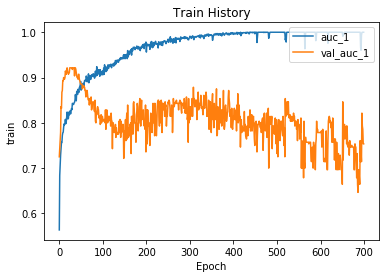

[array([[-0.20001207,  1.6925611 , -0.15049225, -1.00276   ,  0.49379894,
         0.5659879 , -0.9452517 ,  0.41645607, -0.7003178 ],
       [ 0.24866281, -0.5865644 , -0.28371242, -0.29564315,  1.3700826 ,
        -0.89147776,  1.50932   , -1.5822473 ,  0.17233276],
       [ 0.42909464,  0.14610744,  0.9976085 , -0.16340862, -0.48028478,
        -0.4502949 ,  0.399451  , -0.48915547, -0.60466385],
       [-0.18526642,  1.0139803 , -1.9563044 ,  1.5749204 , -2.531902  ,
        -1.2655843 , -0.07466841, -0.36462465,  2.1976423 ],
       [-2.0679069 ,  0.45129672, -1.33099   , -1.4463401 , -0.78299254,
         0.37547508,  0.26796746, -0.41988364,  1.2379127 ],
       [-0.39809752,  1.2926345 , -1.0001874 ,  1.6768341 ,  0.22526179,
        -2.174745  , -1.6693774 , -0.3113824 ,  1.7304641 ]],
      dtype=float32), array([ 0.17044552, -0.467353  ,  0.14787015,  0.29456505,  0.2455819 ,
        0.4994211 , -0.4107682 ,  0.6937089 , -0.2363747 ], dtype=float32), array([[-1.1704173 , -0.

In [4]:
#drawing the lines of losses and metrics
def show_train_history(train_history, x1, x2):
    plot.plot(train_history.history[x1])
    plot.plot(train_history.history[x2])
    plot.title('Train History')
    plot.ylabel('train')
    plot.xlabel('Epoch')
    plot.legend([x1, x2], loc = 'upper right')
    plot.show()

show_train_history(train_history, 'auc_1', 'val_auc_1')

#showing the weights in the model of neural network
print(model.get_weights())

In [5]:
#predicting the outputs of the model based on training data
predictions = model.predict([X1, X2, X3, X4, X5, X6])
print(predictions)

[[6.86363228e-06]
 [9.99998212e-01]
 [9.59940135e-01]
 [2.42937574e-07]
 [3.50969681e-03]
 [1.00000000e+00]
 [9.99818385e-01]
 [1.00000000e+00]
 [9.80416715e-01]
 [9.99123514e-01]
 [7.56106510e-06]
 [6.96560275e-03]
 [1.00000000e+00]
 [1.18598284e-03]
 [2.49470379e-02]
 [9.99999642e-01]
 [6.13968559e-02]
 [9.92136478e-01]
 [9.97395992e-01]
 [9.98551905e-01]
 [3.58762627e-04]
 [4.02027727e-05]
 [1.43993655e-02]
 [9.99639273e-01]
 [1.00000000e+00]
 [1.00000000e+00]
 [9.99592721e-01]
 [9.98984873e-01]
 [7.58150563e-05]
 [1.00000000e+00]
 [2.29938407e-04]
 [6.87985175e-06]
 [3.52651909e-06]
 [7.77698879e-05]
 [3.44746809e-08]
 [1.00000000e+00]
 [9.98774350e-01]
 [9.70478773e-01]
 [9.97382581e-01]
 [1.00000000e+00]
 [9.99998927e-01]
 [9.99696970e-01]
 [3.56695149e-03]
 [9.76932279e-05]
 [1.18638718e-05]
 [9.66073453e-01]
 [9.95582283e-01]
 [9.95769143e-01]
 [9.91400242e-01]
 [1.09930628e-03]
 [2.08725942e-06]
 [9.95201945e-01]
 [1.89653542e-06]
 [1.33186160e-03]
 [1.34739025e-06]
 [4.631335